# importing dependencies

In [59]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

##### Our database is composed of 3 datasets customers, products and sales

# loading the data 
   First of all, we are going to read our data into dataframe using pandas

In [89]:
customers= pd.read_csv('C:/Users/ASUS/Desktop/customersSegmentation/customer.csv',encoding='ISO_8859-1' ,delimiter=';')
products= pd.read_csv('C:/Users/ASUS/Desktop/customersSegmentation/products.csv',encoding='ISO_8859-1' ,delimiter=';')
sales= pd.read_csv('C:/Users/ASUS/Desktop/customersSegmentation/sales.csv',encoding='ISO_8859-1' ,delimiter=';')

# Customers dataset 

In [90]:
customers.head()

,id,country,gender,age,profession
0,127000,France,Female,42,graduation
1,127001,Tunisia,Female,41,basic
2,127002,Tunisia,Female,42,basic
3,127003,Egypt,Female,39,graduation
4,127004,Algeria,Female,43,undergraduation


In [91]:
customers.shape

(1000, 5)

#### ====> The table of customers have 1000 rows and 5 columns.

## Mean | Max | Min | standard deviation

In [92]:
customers.describe()

,id,age
count,1000.000000,1000.00000
mean,127499.500000,39.12600
std,288.819436,10.29933
min,127000.000000,18.00000
25%,127249.750000,32.00000
50%,127499.500000,37.00000
75%,127749.250000,44.00000
max,127999.000000,82.00000


#### conclusion : 
      - the age goes from 18 y.o to 82 years old 
      - the mean age is about 39
      - the standard deviation is about 10.29

## informations on features

In [93]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   int64 
 1   country     999 non-null    object
 2   gender      999 non-null    object
 3   age         1000 non-null   int64 
 4   profession  998 non-null    object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


## Data Cleaning

### Missing values

In [94]:
customers.isnull().sum()

id            0
country       1
gender        1
age           0
profession    2
dtype: int64

##### ===> From the above output, we can conclude and note that:
    - there is missing values in features 
    Let's remove these records   

In [95]:
customers = customers.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(customers))

The total number of data-points after removing the rows with missing values are: 998


### Encoding categorical values 

In [96]:
customers.dtypes

id             int64
country       object
gender        object
age            int64
profession    object
dtype: object

###### ===> There are some categorical features in our data frame; as there are some features in dtype: object). 
###### So we will need to encode them into numeric forms later(country,gender,profession).

In [97]:
numeric_features=customers.select_dtypes(include=['int64','float64']).columns
categorical_features=customers.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
scale=LabelEncoder() # LabelEncoder encodes target labels with value between 0 and n_classes-1.
for i in categorical_features :
    customers[i]=scale.fit_transform(customers[i])
customers.head()

,id,country,gender,age,profession
0,127000,2,0,42,2
1,127001,5,0,41,1
2,127002,5,0,42,1
3,127003,1,0,39,2
4,127004,0,0,43,3


### Outliers

<AxesSubplot: >

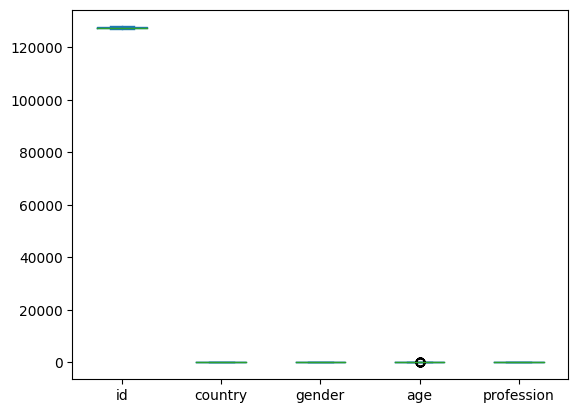

In [98]:
customers.plot.box()

###### ===> there are only outliers in age.

<AxesSubplot: >

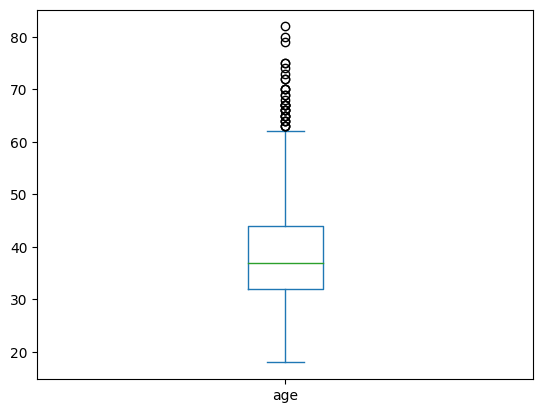

In [99]:
customers['age'].plot.box()

###### ===>  There are outliers : age > 62

#### Removing outliers 

In [100]:
customers = customers[(customers["age"]<=62)]
print("The total number of data-points after removing the outliers are:", len(customers))

The total number of data-points after removing the outliers are: 964


In [101]:
customers.head()

,id,country,gender,age,profession
0,127000,2,0,42,2
1,127001,5,0,41,1
2,127002,5,0,42,1
3,127003,1,0,39,2
4,127004,0,0,43,3


## Correlation Matrix | Feature selection
The correlation coefficient is measured on a scale that varies from + 1 through 0 to – 1. Complete correlation between two variables is expressed by either + 1 or -1.

In [102]:
corr=customers.corr()
corr

,id,country,gender,age,profession
id,1.000000,0.002242,-0.048720,0.069670,-0.012888
country,0.002242,1.000000,0.024652,-0.049161,0.002771
gender,-0.048720,0.024652,1.000000,-0.032866,0.100389
age,0.069670,-0.049161,-0.032866,1.000000,-0.028281
profession,-0.012888,0.002771,0.100389,-0.028281,1.000000


#### Display correlation matrix in heatmap

<AxesSubplot: >

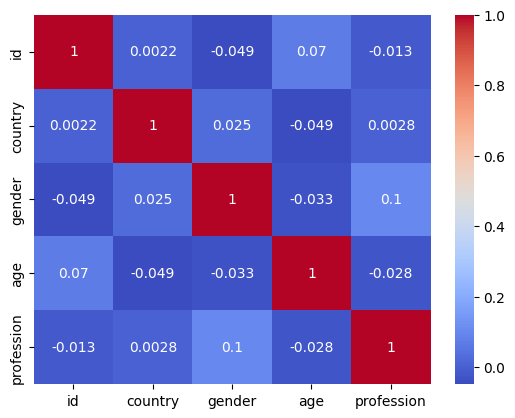

In [103]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

##### From the above output, we can conclude and note that:
    - When one variable increases as the other increases the 
    correlation is positive.
    -  Complete correlation between two variables is expressed by either + 1 or -1.
    -when one decreases as the other increases it is negative. 
    - Complete absence of correlation is represented by 0. 

## Histogram

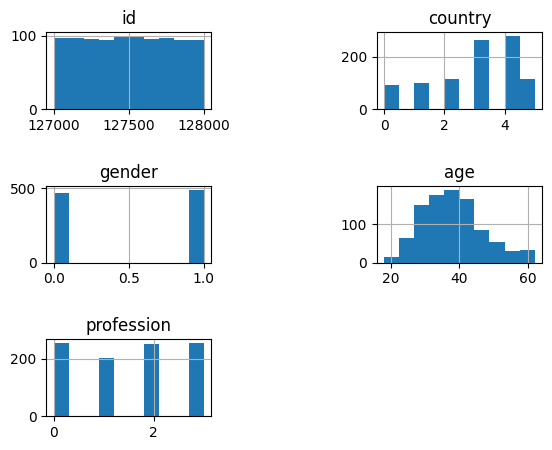

In [104]:
customers.hist()
plt.subplots_adjust(bottom = 0.1, right = 0.9, top = 0.9, wspace = 1, hspace = 1)

## Density Plot

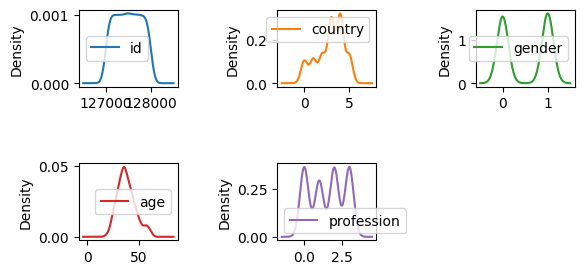

In [105]:
customers.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.subplots_adjust(bottom = 0.1, right = 0.9, top = 0.9, wspace = 1, hspace = 1)

# Products dataset 

In [106]:
products.head()

,id,name,category,price
0,157000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,High-Tech,700
1,157001,Motorola I265 phone,High-Tech,650
2,157002,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,High-Tech,890
3,157003,Motorola i335 Cell Phone Boost Mobile,High-Tech,900
4,157004,Motorola V365 no contract cellular phone AT&T,High-Tech,400


In [107]:
products.shape

(794, 4)

#### ====> The table of products have 794 rows and 4 columns.

## Min | Max | Mean | Standard Deviation

In [108]:
products.describe()

,id,price
count,794.000000,794.000000
mean,157396.500000,513.532746
std,229.352349,280.395833
min,157000.000000,75.000000
25%,157198.250000,210.000000
50%,157396.500000,600.000000
75%,157594.750000,740.000000
max,157793.000000,900.000000


##### conclusion : 
      - the price goes from 75  to 900 
      - the mean age is about 513.53
      - the standard deviation is about 280.39

### informations on features

In [109]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        794 non-null    int64 
 1   name      794 non-null    object
 2   category  794 non-null    object
 3   price     794 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.9+ KB


## Data Cleaning

### Missing values


In [110]:
products.isnull().sum()

id          0
name        0
category    0
price       0
dtype: int64

##### ===> From the above output, we can conclude and note that:
    - there is not missing values

### Encoding categorical values 


In [111]:
products.dtypes

id           int64
name        object
category    object
price        int64
dtype: object

###### ===>  There are some categorical features in our data frame; as there are some features in dtype: object). 
######     So we will need to encode them into numeric forms later(name,category).

In [112]:
numeric_features1=products.select_dtypes(include=['int64','float64']).columns
categorical_features1=products.select_dtypes(include='object').columns
from sklearn.preprocessing import LabelEncoder
scale=LabelEncoder()
for i in categorical_features1 :
    products[i]=scale.fit_transform(products[i])
products.head()

,id,name,category,price
0,157000,116,0,700
1,157001,287,0,650
2,157002,247,0,890
3,157003,321,0,900
4,157004,313,0,400


### Outliers

<AxesSubplot: >

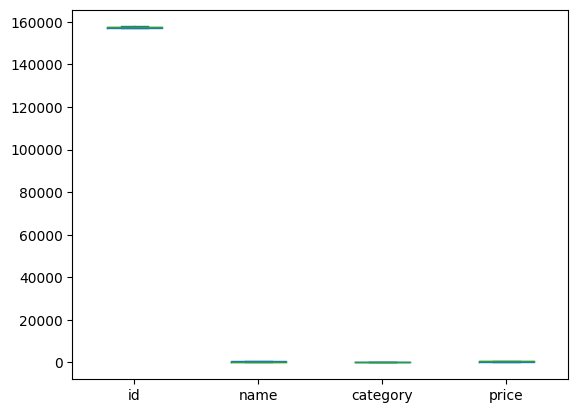

In [113]:
products.plot.box()

###### ===> There are no outliers in this dataset.

## Correlation Matrix | Feature selection
The correlation coefficient is measured on a scale that varies from + 1 through 0 to – 1. Complete correlation between two variables is expressed by either + 1 or -1.

In [114]:
corr1=products.corr()
corr1

,id,name,category,price
id,1.000000,-0.103168,0.696130,-0.758245
name,-0.103168,1.000000,-0.121287,0.096959
category,0.696130,-0.121287,1.000000,-0.793146
price,-0.758245,0.096959,-0.793146,1.000000


#### Display correlation matrix in heatmap

<AxesSubplot: >

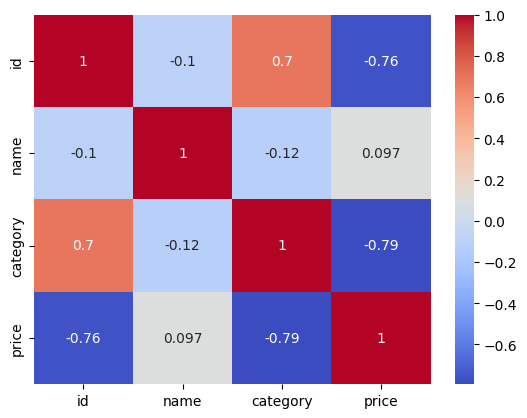

In [115]:
sns.heatmap(corr1,annot=True,cmap='coolwarm')

##### From the above output, we can conclude and note that:
    - When one variable increases as the other increases the 
    correlation is positive.
    -  Complete correlation between two variables is expressed by either + 1 or -1.
    -when one decreases as the other increases it is negative. 
    - Complete absence of correlation is represented by 0. 

## Histogram

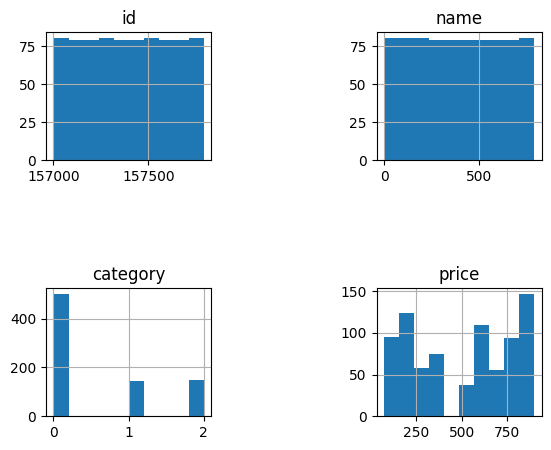

In [116]:
products.hist()
plt.subplots_adjust(bottom = 0.1, right = 0.9, top = 0.9, wspace = 1, hspace = 1)

## Density Plot

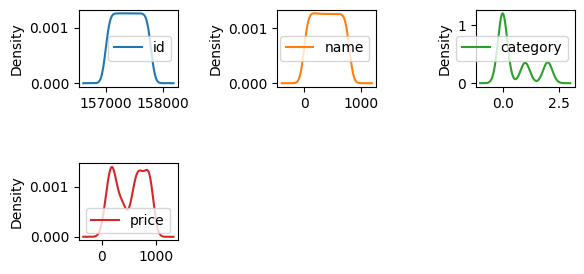

In [117]:
products.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.subplots_adjust(bottom = 0.1, right = 0.9, top = 0.9, wspace = 1, hspace = 1)

#  Sales dataset

In [118]:
sales.head()

,customerID,productsID,amount,Sdate
0,127971,157014,890,25/08/2020
1,127949,157015,650,12/10/2020
2,127667,157016,550,06/12/2021
3,127978,157017,850,19/02/2021
4,127506,157018,600,10/04/2021


In [119]:
sales.shape

(3015, 4)

#### =====> The table of sales have 3015 rows and 4 columns.

## Mean | Max | Min | Standard Deviation

In [120]:
sales.describe()

,customerID,productsID,amount
count,3015.000000,3015.000000,3015.000000
mean,127491.270315,157338.527032,583.654726
std,287.098566,212.488393,256.581276
min,127000.000000,157000.000000,75.000000
25%,127247.000000,157161.000000,400.000000
50%,127484.000000,157331.000000,650.000000
75%,127736.000000,157489.000000,800.000000
max,127998.000000,157793.000000,900.000000


##### conclusion : 
      - the amount of sales goes from 75 to 900 
      - the mean amount is about 583.65
      - the standard deviation is about 256.58

### informations on features

In [121]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  3015 non-null   int64 
 1   productsID  3015 non-null   int64 
 2   amount      3015 non-null   int64 
 3   Sdate       3015 non-null   object
dtypes: int64(3), object(1)
memory usage: 94.3+ KB


##### ===> Sdate that indicates the date of a sale is not parsed as DateTime

## Data Cleaning

### Convert the type of Sdate to DateTime

In [122]:
sales["Sdate"] = pd.to_datetime(sales["Sdate"])
sales.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6476\1178799660.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales["Sdate"] = pd.to_datetime(sales["Sdate"])


,customerID,productsID,amount,Sdate
0,127971,157014,890,2020-08-25
1,127949,157015,650,2020-12-10
2,127667,157016,550,2021-06-12
3,127978,157017,850,2021-02-19
4,127506,157018,600,2021-10-04


In [123]:
sales.dtypes

customerID             int64
productsID             int64
amount                 int64
Sdate         datetime64[ns]
dtype: object

#### ===> Now, Sdate is of type datetime

### Missing values

In [124]:
sales.isnull().sum()

customerID    0
productsID    0
amount        0
Sdate         0
dtype: int64

In [125]:
sales = sales.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(sales))

The total number of data-points after removing the rows with missing values are: 3015


##### From the above output, we can conclude and note that:
    - there is missing values


### Encoding categorical values 

In [126]:
sales.dtypes 

customerID             int64
productsID             int64
amount                 int64
Sdate         datetime64[ns]
dtype: object

###### ===> There are some categorical features in our data frame; as there are some features in dtype: object). 
###### So we will need to encode them into numeric forms later(Sdate).

In [127]:
numeric_features2=sales.select_dtypes(include=['int64','float64']).columns
categorical_features2=sales.select_dtypes(include=['object','datetime64[ns]']).columns
from sklearn.preprocessing import LabelEncoder
scale=LabelEncoder()
for i in categorical_features2 :
    sales[i]=scale.fit_transform(sales[i])
sales.head()

,customerID,productsID,amount,Sdate
0,127971,157014,890,42
1,127949,157015,650,118
2,127667,157016,550,292
3,127978,157017,850,183
4,127506,157018,600,401


### Outliers

<AxesSubplot: >

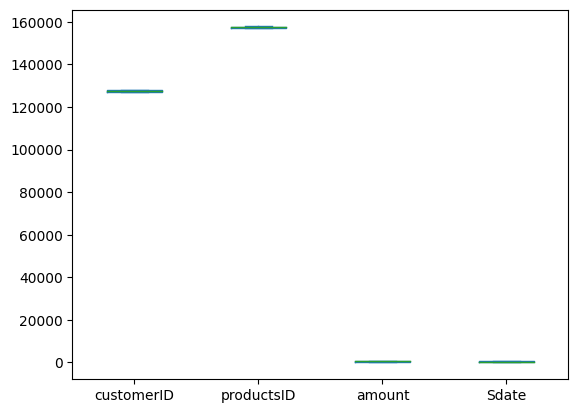

In [128]:
sales.plot.box()

###### ===> There are no outliers in this dataset.

## Correlation Matrix | Feature selection
The correlation coefficient is measured on a scale that varies from + 1 through 0 to – 1. Complete correlation between two variables is expressed by either + 1 or -1.

In [129]:
corr2=sales.corr()
corr2

,customerID,productsID,amount,Sdate
customerID,1.000000,-0.005869,0.012582,-0.004114
productsID,-0.005869,1.000000,-0.661335,-0.012845
amount,0.012582,-0.661335,1.000000,0.007242
Sdate,-0.004114,-0.012845,0.007242,1.000000


#### Display correlation matrix in heatmap

<AxesSubplot: >

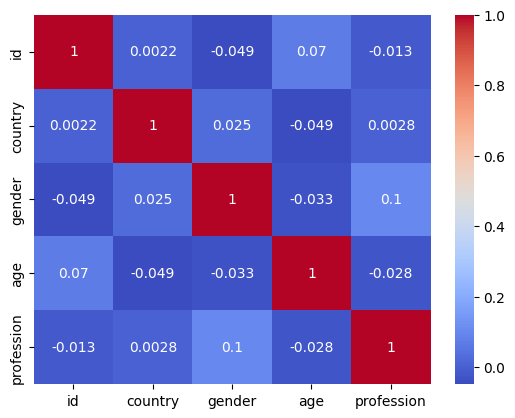

In [130]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

##### From the above output, we can conclude and note that:
    - When one variable increases as the other increases the 
    correlation is positive.
    -  Complete correlation between two variables is expressed by either + 1 or -1.
    -when one decreases as the other increases it is negative. 
    - Complete absence of correlation is represented by 0. 

## Histogram

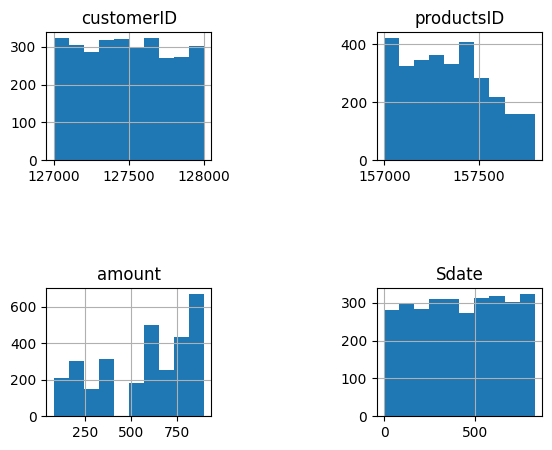

In [131]:
sales.hist()
plt.subplots_adjust(bottom = 0.1, right = 0.9, top = 0.9, wspace = 1, hspace = 1)

## Density Plot

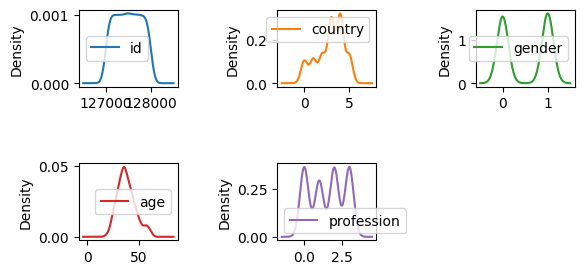

In [49]:
customers.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.subplots_adjust(bottom = 0.1, right = 0.9, top = 0.9, wspace = 1, hspace = 1)

# Customers Segmentation

In [132]:
data=[]
for idc in customers["id"]:
    total =sum(sales["amount"][(sales["customerID"]==idc)])
    gender=sum(customers["gender"][(customers["id"]==idc)])
    age=sum(customers["age"][(customers["id"]==idc)])
    country=sum(customers["country"][(customers["id"]==idc)])
    data.append([idc,country,gender,age,total])
dataF=pd.DataFrame(data,columns=['id','country','gender','age','total'])



In [133]:
dataF

,id,country,gender,age,total
0,127000,2,0,42,210
1,127001,5,0,41,800
2,127002,5,0,42,2540
3,127003,1,0,39,2930
4,127004,0,0,43,1500
...,...,...,...,...,...
959,127995,3,1,29,290
960,127996,4,1,44,2439
961,127997,3,1,62,1129
962,127998,3,0,28,800


## most profitable customers

In [52]:
dataF[["id","total"]].sort_values(by='total',ascending=False)

,id,total
531,127547,7470
928,127962,6860
682,127704,6749
460,127476,6340
519,127535,6250
...,...,...
605,127625,0
866,127897,0
865,127896,0
613,127633,0


###### Les clients les plus rentables sont 
     - 127547
     - 127962
     - 127704
     - 127476
     - 127535
###### Les clients les moins rentables sont
     - 127999
     - 127633
     

## 

# Clustering

## Age and total of purchases

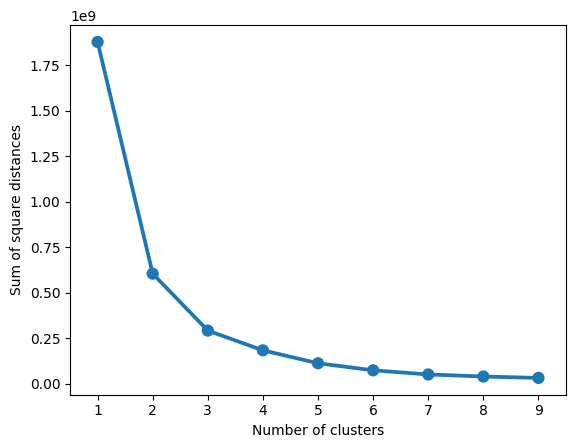

In [134]:
ageTotal=dataF[["total","age"]]
dist={}
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(ageTotal)
    dist[k]=km.inertia_
sns.pointplot(x=list(dist.keys()),y=list(dist.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square distances")
plt.show()

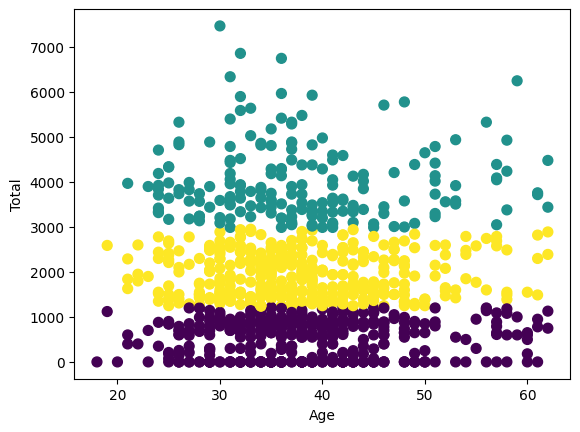

In [135]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(ageTotal)
plt.scatter( x = 'age' ,y = 'total' , data = ageTotal , c = algorithm.labels_ , s = 50 )
plt.ylabel('Total') 
plt.xlabel('Age')
plt.show()

## Gender and Total of purchases

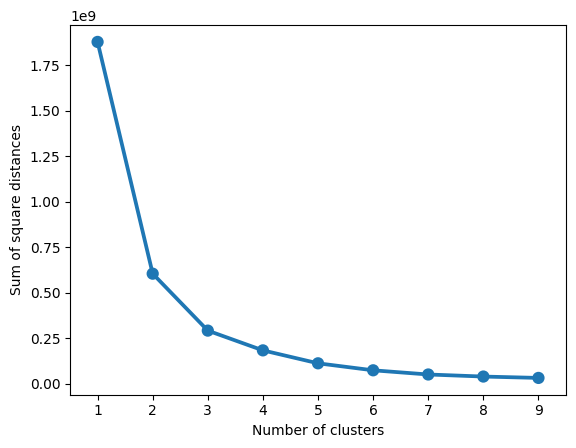

In [136]:
genderTotal=dataF[["gender","total"]]
dist={}
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(genderTotal)
    dist[k]=km.inertia_
sns.pointplot(x=list(dist.keys()),y=list(dist.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square distances")
plt.show()

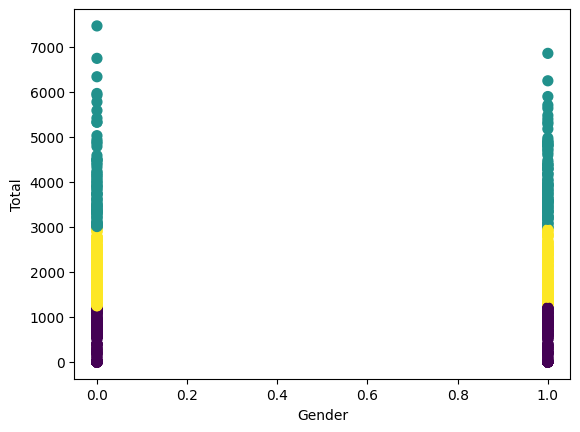

In [137]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(genderTotal)
plt.scatter( x = 'gender' ,y = 'total' , data = genderTotal , c = algorithm.labels_ , s = 50 )
plt.ylabel('Total') 
plt.xlabel('Gender')
plt.show()

## Country and total of purchases

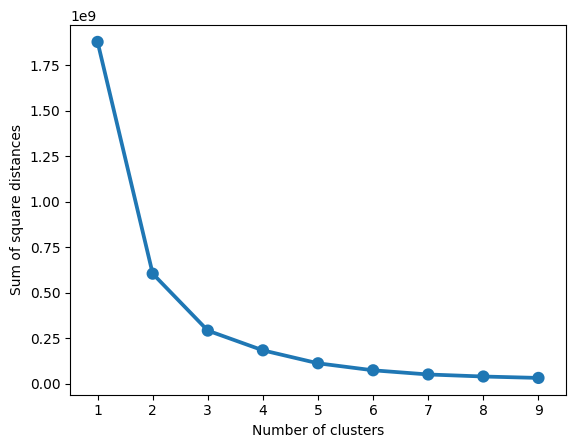

In [138]:
countryTotal=dataF[["country","total"]]
dist={}
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(countryTotal)
    dist[k]=km.inertia_
sns.pointplot(x=list(dist.keys()),y=list(dist.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square distances")
plt.show()

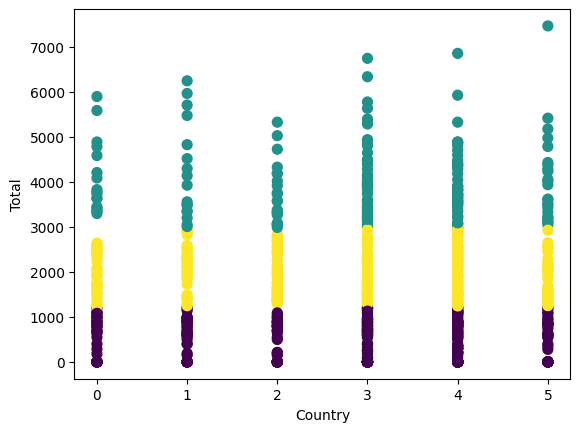

In [139]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(countryTotal)
plt.scatter( x = 'country' ,y = 'total' , data = countryTotal , c = algorithm.labels_ , s = 50 )
plt.ylabel('Total') 
plt.xlabel('Country')
plt.show()